In [112]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pandas.plotting import scatter_matrix

# stop warnings
import warnings
warnings.filterwarnings('ignore')

In [113]:
# load data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [114]:
test1 = test.copy()

In [115]:
# look at the data
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15682541,Hartley,616,Spain,Female,36,6,132311.71,1,0,0,15462.84,0
1,2,15695699,Calabrese,687,France,Male,35,8,0.00,2,1,0,10334.05,0
2,3,15624188,Chiu,712,France,Female,33,6,0.00,2,1,1,190686.16,0
3,4,15812191,Brennan,553,France,Male,33,4,118082.89,1,0,0,94440.45,0
4,5,15636673,Onwuatuegwu,667,France,Male,31,1,119266.69,1,1,1,28257.63,0


In [116]:
train.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [117]:
# check null values
train.isnull().sum().sum()

0

In [118]:
test.isnull().sum().sum()

0

In [119]:
# check for balance of data
print('the number of not-churned:' + str(train['Exited'].value_counts()[0]) + 'which is', round(train['Exited'].value_counts()[0]/len(train) * 100,2), '% of the dataset')
print('the number of churned:' + str(train['Exited'].value_counts()[1]) + 'which is', round(train['Exited'].value_counts()[1]/len(train) * 100,2), '% of the dataset')

the number of not-churned:7727which is 79.67 % of the dataset
the number of churned:1972which is 20.33 % of the dataset


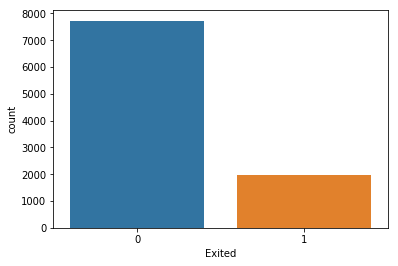

In [120]:
# visualize the category class
sns.countplot(x='Exited', data=train)
# category class is fairly imbalanced

In [121]:
# shuffle the data
train = train.sample(frac=1)
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8185,8186,15567506,Cheatham,738,Germany,Female,40,6,114940.67,2,1,1,194895.57,1
4722,4723,15615254,Clark,555,France,Male,40,10,43028.77,1,1,0,170514.21,0
9123,9124,15666200,Lombardo,689,France,Female,40,1,0.00,2,1,1,119446.64,0
8602,8603,15790019,Onwughara,520,France,Male,35,9,105387.89,1,1,1,25059.06,0
1919,1920,15806049,Lee,714,Germany,Female,49,5,140510.89,1,1,0,141914.94,0


In [122]:
# oversampling
from imblearn.over_sampling import SMOTE

count_class_0, count_class_1 = train.Exited.value_counts()

# divide by class
train_class_0 = train[train['Exited'] == 0]
train_class_1 = train[train['Exited'] == 1]

Random over-sampling:
1    7727
0    7727
Name: Exited, dtype: int64


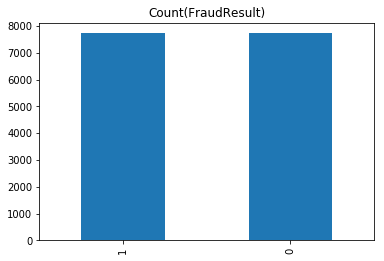

In [123]:
train_class_1_over = train_class_1.sample(count_class_0, replace=True)
train_test_over = pd.concat([train_class_0, train_class_1_over], axis=0)

print('Random over-sampling:')
print(train_test_over.Exited.value_counts())

train_test_over.Exited.value_counts().plot(kind='bar', title='Count(FraudResult)');

In [124]:
train1 = train_test_over
#missing values
train1.isnull().sum().sum()

0

In [125]:
# drop columns
train1 = train1.drop(['RowNumber','Surname'], axis=1)
test = test.drop(['RowNumber','Surname'], axis=1)

In [126]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train1['Gender'] = le.fit_transform(train1['Gender'])
test['Gender'] = le.fit_transform(test['Gender'])

In [127]:
# standrd scaler
from sklearn.preprocessing import MinMaxScaler
# creditscore
scaler_CreditScore = MinMaxScaler()
train1['CreditScore'] = train1['CreditScore'].astype('float64')
train1['CreditScore'] = scaler_CreditScore.fit_transform(train1.CreditScore.values.reshape(-1,1))
test['CreditScore'] = scaler_CreditScore.fit_transform(test.CreditScore.values.reshape(-1,1))

# age
scaler_Age = MinMaxScaler()
train1['Age'] = scaler_Age.fit_transform(train1.Age.values.reshape(-1,1))
test['Age'] = scaler_CreditScore.fit_transform(test.Age.values.reshape(-1,1))

# tenure
scaler_Tenure = MinMaxScaler()
train1['Tenure'] = scaler_Tenure.fit_transform(train1.Tenure.values.reshape(-1,1))
test['Tenure'] = scaler_Tenure.fit_transform(test.Tenure.values.reshape(-1,1))
# balance
scaler_Balance = MinMaxScaler()
train1['Balance'] = scaler_Balance.fit_transform(train1.Balance.values.reshape(-1,1))
test['Balance'] = scaler_Balance.fit_transform(test.Balance.values.reshape(-1,1))
# estimated salary
scaler_EstimatedSalary = MinMaxScaler()
train1['EstimatedSalary'] = scaler_EstimatedSalary.fit_transform(train1.EstimatedSalary.values.reshape(-1,1))
test['EstimatedSalary'] = scaler_EstimatedSalary.fit_transform(test.EstimatedSalary.values.reshape(-1,1))

In [128]:
test.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15634602,0.512658,France,0,0.383333,0.2,0.000000,1,1,1,0.505956
1,15647311,0.489451,Spain,0,0.366667,0.1,0.393194,1,0,1,0.562171
2,15619304,0.265823,France,0,0.383333,0.8,0.749067,3,1,0,0.569146
3,15701354,0.681435,France,0,0.333333,0.1,0.000000,2,0,0,0.468180
4,15737888,1.000000,Spain,0,0.400000,0.2,0.588848,1,1,1,0.394143


In [129]:
# drop irrelevant column
train1 = train1.drop(['CustomerId'], axis=1)
test = test.drop(['CustomerId'], axis=1)
# dummies
train1 = pd.get_dummies(train1, prefix_sep='_', drop_first=True)
test = pd.get_dummies(test, prefix_sep='_', drop_first=True)
test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,0.512658,0,0.383333,0.2,0.000000,1,1,1,0.505956,0,0
1,0.489451,0,0.366667,0.1,0.393194,1,0,1,0.562171,0,1
2,0.265823,0,0.383333,0.8,0.749067,3,1,0,0.569146,0,0
3,0.681435,0,0.333333,0.1,0.000000,2,0,0,0.468180,0,0
4,1.000000,0,0.400000,0.2,0.588848,1,1,1,0.394143,0,1


In [130]:
# bring exited column to be 1st
Exited = train1['Exited']
train1.drop(['Exited'], axis=1, inplace=True)
train1.insert(0,'Exited', Exited)

In [131]:
train1.head()

,Exited,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
4722,0,0.410,1,0.297297,1.0,0.171499,1,1,0,0.852595,0,0
9123,0,0.678,0,0.297297,0.1,0.000000,2,1,1,0.597232,0,0
8602,0,0.340,1,0.229730,0.9,0.420043,1,1,1,0.125249,0,0
1919,0,0.728,0,0.418919,0.5,0.560032,1,1,0,0.709585,1,0
57,0,0.774,1,0.310811,0.1,0.406383,1,1,1,0.617737,0,0


In [132]:
# rename the new columns
train1.rename(columns={'IsActiveMember':'Active',
                       'EstimatedSalary':'Salary',
                       'HasCrCard':'Card',
                       'Geography_Germany':'Germany',
                       'Geography_Spain':'Spain'}, inplace=True)
test.rename(columns={'IsActiveMember':'Active',
                       'EstimatedSalary':'Salary',
                       'HasCrCard':'Card',
                       'Geography_Germany':'Germany',
                       'Geography_Spain':'Spain'}, inplace=True)
test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,Card,Active,Salary,Germany,Spain
0,0.512658,0,0.383333,0.2,0.000000,1,1,1,0.505956,0,0
1,0.489451,0,0.366667,0.1,0.393194,1,0,1,0.562171,0,1
2,0.265823,0,0.383333,0.8,0.749067,3,1,0,0.569146,0,0
3,0.681435,0,0.333333,0.1,0.000000,2,0,0,0.468180,0,0
4,1.000000,0,0.400000,0.2,0.588848,1,1,1,0.394143,0,1


In [133]:
test.to_csv('validation.csv', index=False)

In [134]:
# import statsmodels.formula.api
import statsmodels.formula.api as smf
# define the regression formular
model = smf.ols(formula='Exited ~ Tenure + NumOfProducts + Card + Active + CreditScore + Balance + Salary + Age + Germany + Spain + Gender', data=train1)
# fit the regression
model_fit = model.fit()
# extract and rreadjusted r-squared
regression_adj_rsq = model_fit.rsquared_adj
print(regression_adj_rsq)

0.2033267266625185


In [135]:
# feature selection
y = train1.Exited
X = train1.drop(['Exited'], axis=1)

In [136]:
# split datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [137]:
#simple models
# logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=1.0, penalty='l2', tol=0.0001)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score

LR = f1_score(y_test,y_pred)

In [138]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

knn = f1_score(y_test,y_pred)

In [139]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred =gnb.predict(X_test)

gnb = f1_score(y_test,y_pred)

In [140]:
# decision tree
from sklearn import tree
tree = tree.DecisionTreeClassifier(random_state=42)
tree = tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

tree = f1_score(y_test,y_pred)

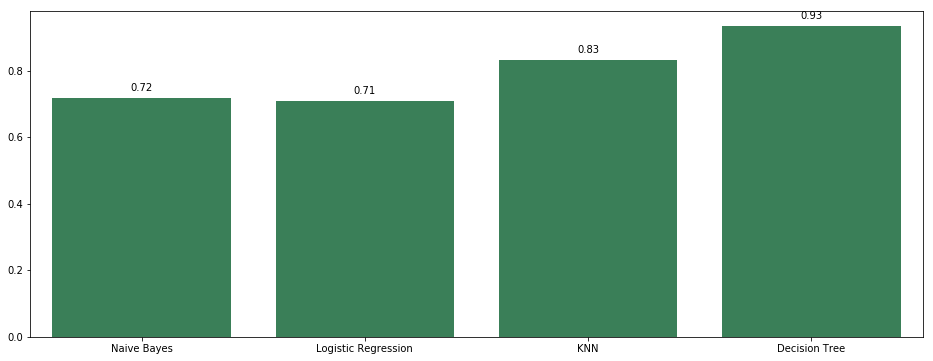

In [141]:
plt.figure(figsize=(16, 6))
s = sns.barplot(x=["Naive Bayes", "Logistic Regression","KNN","Decision Tree"], y=[gnb,LR,knn,tree],color="seagreen")
for p in s.patches:
    s.annotate(format(p.get_height(), '.2f'), 
              (p.get_x() + p.get_width() / 2., 

               p.get_height()), ha = 'center', va = 'center', 
              xytext = (0, 10), textcoords = 'offset points')

ENSEMBLE

In [142]:
# ADABOOST
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=100)
adb = adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)

adb = f1_score(y_test,y_pred)

In [143]:
# GRADIENT TREE BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier ()
gbc = gbc.fit(X_train,y_train)
y_pred = gbc.predict(X_test)

gbc = f1_score(y_test,y_pred)

In [144]:
# XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier ()
xgb = xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

xgb = f1_score(y_test,y_pred)

In [145]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=5)
lgbm = lgbm.fit(X_train,y_train)
y_pred = lgbm.predict(X_test)

lgbm = f1_score(y_test,y_pred)

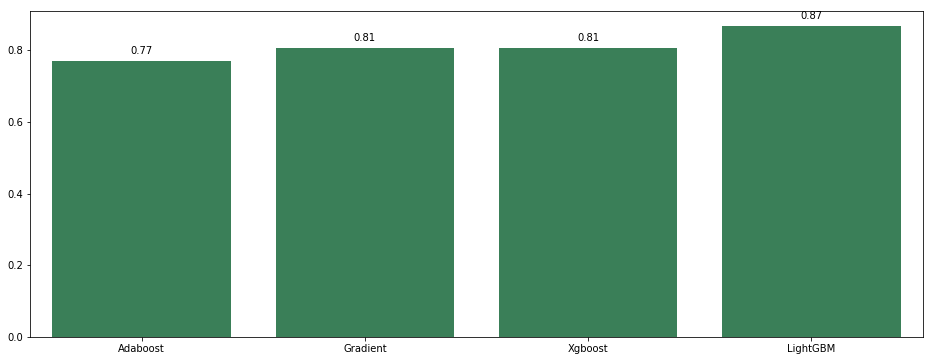

In [146]:
plt.figure(figsize=(16, 6))
s = sns.barplot(x=["Adaboost", "Gradient","Xgboost","LightGBM"], y=[adb,gbc,xgb,lgbm],color="seagreen")
for p in s.patches:
    s.annotate(format(p.get_height(), '.2f'), 
              (p.get_x() + p.get_width() / 2., 

               p.get_height()), ha = 'center', va = 'center', 
              xytext = (0, 10), textcoords = 'offset points')

In [147]:
# loaad real test data
validation = pd.read_csv('validation.csv')

In [148]:
# LightGBM
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=5)
lgbm = lgbm.fit(X_train,y_train)

y_to_submitted = lgbm.predict(validation)

In [149]:
submission = pd.DataFrame({'CustomerId':test1['CustomerId'],'Exited':y_to_submitted})

In [150]:
submission.to_csv('submission1.csv', index=False)